In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Постановка задачи

$$u_{xx}+u_{yy} = 0$$
$$u(0,y) = 1$$
$$u(x,0) = 4$$
$$u(1,y) = 3$$
$$u(x,1) = 2$$

## Решение методом Якоби

$$h_x = h_y$$

$$u_{ml}^{i+1} = \frac{1}{4}(u_{m-1,l}^i+u_{m,l-1}^i+u_{m+1,l}^i+u_{m,l+1}^i)$$

## Решение методом Зейделя

$$u_{ml}^{i+1} = \frac{1}{4}(u_{m-1,l}^{i+1}+u_{m,l-1}^{i+1}+u_{m+1,l}^i+u_{m,l+1}^i)$$

## Решение методом верхней релаксации

$$u_{ml}^{i+1} = (1 - \tau)u_{ml}^i + \tau \frac{1}{4}(u_{m-1,l}^{i+1}+u_{m,l-1}^{i+1}+u_{m+1,l}^i+u_{m,l+1}^i)$$


In [2]:
def init_layer(N):
    layer = np.zeros([N, N])
    for i in range(N):
        layer[i][0] = 4
        layer[0][i] = 1
        layer[i][-1] = 2
        layer[-1][i] = 3
    return layer

def init_layer_free(N):
    layer = np.zeros([N, N])
    return layer


def iteration_Zeidel(init_layer, current_layer, N):
    next_layer = init_layer(N)
    for i in range(1, N - 1):
        for j in range(1 + i % 2, N - 1, 2):
            next_layer[i][j] = 1 / 4 * (current_layer[i][j - 1] + current_layer[i][j + 1] 
                                       + current_layer[i - 1][j] + current_layer[i + 1][j])
    for i in range(1, N - 1):
        for j in range(1 + (i + 1) % 2, N - 1, 2):
            next_layer[i][j] = 1 / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    return next_layer

def iteration_Jacobi(init_layer, current_layer, N):
    next_layer = init_layer(N)
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            next_layer[i][j] = 1 / 4 * (current_layer[i][j - 1] + current_layer[i][j + 1] 
                                       + current_layer[i - 1][j] + current_layer[i + 1][j])
    return next_layer

tau = 0.5

def iteration_upper_relaxation(init_layer, current_layer, N):
    next_layer = init_layer(N)
    for i in range(1, N - 1):
        for j in range(1 + i % 2, N - 1, 2):
            next_layer[i][j] = (1 - tau) * current_layer[i][j] + tau / 4 * (current_layer[i][j - 1] + current_layer[i][j + 1] 
                                       + current_layer[i - 1][j] + current_layer[i + 1][j])
    for i in range(1, N - 1):
        for j in range(1 + (i + 1) % 2, N - 1, 2):
            next_layer[i][j] = (1 - tau) * current_layer[i][j] + tau / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    return next_layer

In [3]:
def difference(layer1, layer2):
    return np.max(np.abs(layer1 - layer2))

In [4]:
n_iter = 0
def iter_solve(init_layer, iteration, N, L, error = 0.00001):
    global n_iter
    n_iter = 0
    current_layer = init_layer(N)
    current_error = 1
    previous_layer = init_layer(N)
    previous_diff = 1
    current_diff = 1
    while (current_error > error and current_diff < 1000) or n_iter < 10:
        n_iter += 1
        previous_layer = current_layer
        current_layer = iteration(init_layer, current_layer, N)
        previous_diff = current_diff
        current_diff = difference(current_layer, previous_layer)
        if previous_diff - current_diff > 0:
            current_error = current_diff**2 / (previous_diff - current_diff)
    if current_diff >= 1000:
        n_iter = 0
    Y, X  = np.meshgrid(np.linspace(0, L, N), np.linspace(0, L, N))
    return (X, Y, current_layer)

6278


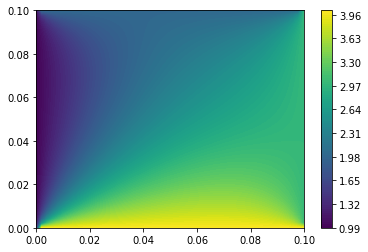

In [21]:
X1, Y1, Z1 = iter_solve(init_layer, iteration_Jacobi, 50, 0.1)
cs = plt.contourf(X1, Y1, Z1, 100)
plt.colorbar(cs)
print(n_iter)

3140


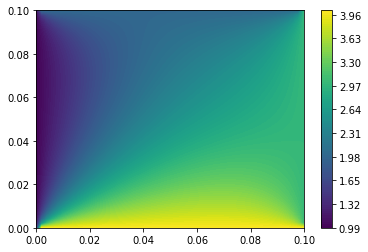

In [22]:
X2, Y2, Z2 = iter_solve(init_layer, iteration_Zeidel, 50, 0.1)
cs = plt.contourf(X2, Y2, Z2, 100)
plt.colorbar(cs)
print(n_iter)

1419


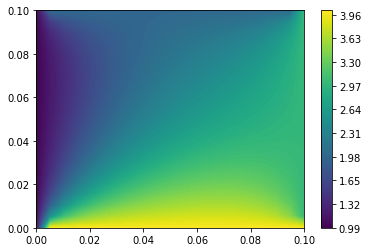

In [7]:
X3, Y3, Z3 = iter_solve(init_layer, iteration_upper_relaxation, 20, 0.1)
cs = plt.contourf(X2, Y2, Z2, 100)
plt.colorbar(cs)
print(n_iter)

In [38]:
def test_tau(N, ntau):
    global tau
    tau = ntau
    iter_solve(init_layer, iteration_upper_relaxation, N, 0.1, error = 0.1)
    return n_iter

1.0 135.0
1.11 108.0
1.22 86.0
1.33 68.0
1.44 52.0
1.55 38.0
1.6600000000000001 25.0
1.77 17.0
1.88 38.0
1.99 333.0


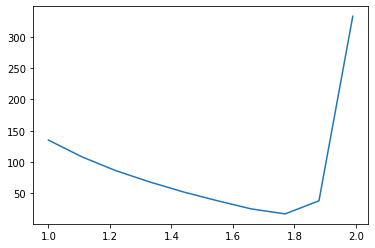

In [88]:
taus = np.linspace(1.00, 1.99, 10)
xs = np.zeros(10)
for i in range(10):
    xs[i] = test_tau(20, taus[i])
    print(taus[i], xs[i])
plt.plot(taus, xs)

In [24]:
def Jacobi_get_spectral_radius(N):
    current_layer = np.zeros([N, N])
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            current_layer[i][j] = 1
    previous_layer = init_layer_free(N)
    for i in range(10000):
        previous_layer = current_layer
        current_layer = iteration_Jacobi(init_layer_free, current_layer, N)
    return np.max(abs(current_layer)) / np.max(abs(previous_layer))

In [25]:
Jacobi_get_spectral_radius(50)

0.9979453927503362

In [26]:
2 / (1 + math.sqrt(1 - 0.9979453927503362**2))

1.8795752032570257

3140


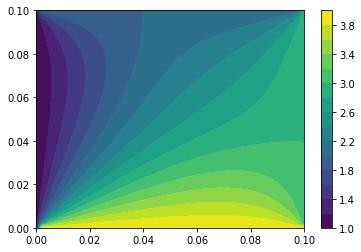

In [13]:
Xhq, Yhq, Zhq = iter_solve(init_layer, iteration_Zeidel, 50, 0.1)
cs = plt.contourf(Xhq, Yhq, Zhq, 15)
plt.colorbar(cs)
print(n_iter)

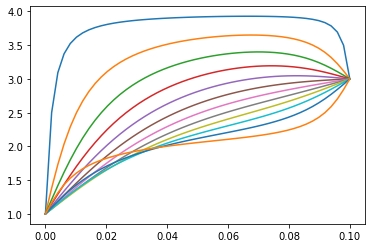

In [14]:
for i in range(1, 49, 4):
    plt.plot(np.transpose(Xhq)[i], np.transpose(Zhq)[i])

In [90]:
tau = 1.7
X25, Y25, Z25 = iter_solve(init_layer, iteration_upper_relaxation, 26, 0.1, error = 0.0000001)

In [89]:
tau = 1.87
X50, Y50, Z50 = iter_solve(init_layer, iteration_upper_relaxation, 51, 0.1, error = 0.0000001)

In [60]:
tau = 1.94
X100, Y100, Z100 = iter_solve(init_layer, iteration_upper_relaxation, 101, 0.1, error = 0.0000001)

In [61]:
tau = 1.9655
X200, Y200, Z200 = iter_solve(init_layer, iteration_upper_relaxation, 201, 0.1, error = 0.0000001)

In [91]:
def crop(A, rx, ry):
    xm, ym = A.shape
    res = np.zeros([(xm - 1) // rx + 1, (ym - 1) // ry + 1])
    for i in range(0, (xm - 1) // rx + 1):
        for j in range(0, (ym - 1) // ry + 1):
            res[i][j] = A[i * rx][j * ry]
    return res

In [93]:
np.sum(np.abs(Z25 - crop(Z50, 2, 2)))

0.4392621039638771

In [100]:
(np.abs(Z50 - crop(Z100, 2, 2)))[13][25]

0.0001820634104858776

In [103]:
(np.abs(Z100 - crop(Z200, 2, 2)))[26][50]

4.5776674998609934e-05

912


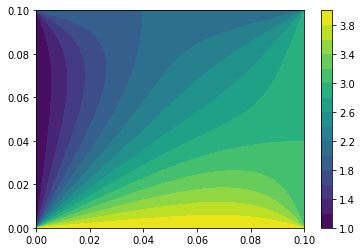

In [52]:
cs = plt.contourf(X200, Y200, Z200, 15)
plt.colorbar(cs)
print(n_iter)

In [130]:
Z50diff = (np.abs(Z50 - crop(Z100, 2, 2)))
Z100diff = (np.abs(Z100 - crop(Z200, 2, 2)))

In [128]:
for i in range(51):
    for j in range(51):
        if Z50diff[i][j] > -6:
            print(i, j, Z50diff[i][j])

1 2 -4.2237712711125095
1 3 -4.612378567507912
1 4 -5.17277601816569
1 5 -5.717051220009896
1 47 -5.710393508504195
1 48 -5.322112608731359
2 1 -4.223771185461328
2 3 -5.281350297134665
2 4 -5.29117105900362
2 5 -5.555357876640849
2 6 -5.881600820335087
2 49 -5.322650912956799
3 1 -4.612378060959237
3 2 -5.281349222159929
3 5 -5.933623628125865
3 49 -5.711579629942529
4 1 -5.172774991415611
4 2 -5.291169946763603
5 1 -5.7170488200191025
5 2 -5.555355535807341
5 3 -5.933616228060254
6 2 -5.88159840073025
47 1 -5.71039198976763
47 49 -5.710993738419527
48 1 -5.322112351849541
48 49 -5.322383132666804
49 2 -5.322651169978229
49 3 -5.711581150483073
49 47 -5.710992218770092
49 48 -5.322382875715165


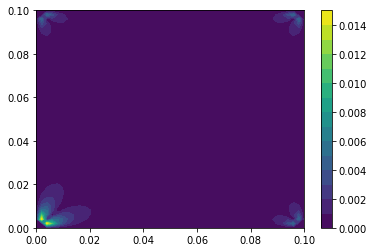

In [131]:
cs = plt.contourf(X50, Y50, Z50diff, 15)
plt.colorbar(cs)

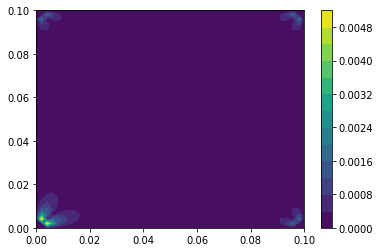

In [142]:
cs = plt.contourf(X50, Y50, Z10050diff, 15)
plt.colorbar(cs)

In [141]:
Z10050diff = crop(Z100diff, 2, 2)

<ipython-input-145-9370dabd7880>:1: RuntimeWarning: invalid value encountered in true_divide
  cs = plt.contourf(X50, Y50, Z50diff / Z10050diff, 100)


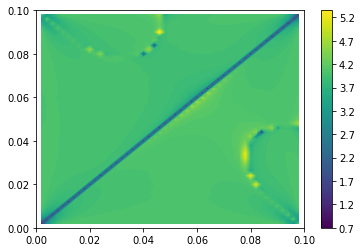

In [145]:
cs = plt.contourf(X50, Y50, Z50diff / Z10050diff, 100)
plt.colorbar(cs)

In [136]:
z10050diff.scale

NameError: name 'z10050diff' is not defined

In [146]:
np.sum(Z50diff)

0.60316262563722

In [147]:
np.sum(Z10050diff)

0.1607251153676632

In [148]:
math.log(0.60316262563722/0.1607251153676632,2)

1.907951649940224